In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
from datetime import datetime

In [2]:
# Load the dataset
# put your file path here
file_path = 'Netflix_cleaned_1.csv'
df = pd.read_csv(file_path)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7465 entries, 0 to 7464
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7465 non-null   object 
 1   country          7465 non-null   object 
 2   date_added       7465 non-null   object 
 3   month            7465 non-null   int64  
 4   day              7465 non-null   int64  
 5   year             7465 non-null   int64  
 6   release_year     7465 non-null   int64  
 7   rating           7465 non-null   object 
 8   duration_min     4978 non-null   float64
 9   duration_season  2487 non-null   float64
 10  difference       7465 non-null   int64  
 11  continent        7465 non-null   object 
 12  country_cleaned  7465 non-null   object 
 13  duration         7465 non-null   object 
 14  listed_in        7465 non-null   object 
 15  description      7465 non-null   object 
 16  show_id          7465 non-null   object 
 17  director      

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [3]:
'''
#3 (victor)
Question: what age group are they targeting distrution of rating
Columns req: "rating", count of "type", "year" (maybe to show the trend in target audience)
comments:
Business perspective:
more content in the rating of "anyone can watch sort of type" means that
the range and count of target audiences more thus increasing the subscriptions (??? not quite sure here as well)
'''

'\n#3 (victor)\nQuestion: what age group are they targeting distrution of rating\nColumns req: "rating", count of "type", "year" (maybe to show the trend in target audience)\ncomments:\nBusiness perspective:\nmore content in the rating of "anyone can watch sort of type" means that\nthe range and count of target audiences more thus increasing the subscriptions (??? not quite sure here as well)\n'

In [4]:
list(df['rating'].unique())

['pg-13',
 'tv-ma',
 'pg',
 'tv-14',
 'tv-pg',
 'tv-y',
 'tv-y7',
 'r',
 'tv-g',
 'g',
 'nc-17',
 'nr',
 'tv-y7-fv',
 'ur']

In [5]:
sorted(df['release_year'].unique())

[np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021)]

In [6]:
list(df['year'].unique())

[np.int64(2021),
 np.int64(2020),
 np.int64(2019),
 np.int64(2018),
 np.int64(2017),
 np.int64(2016),
 np.int64(2015),
 np.int64(2014),
 np.int64(2013),
 np.int64(2012),
 np.int64(2011)]

In [7]:
# Ensure the mapping for age groups includes all unique ratings
age_groups = {
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-PG': 'Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'NC-17': 'Adults',
    'TV-MA': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'TV-Y7-FV': 'Kids',
    'pg-13': 'Teens',
    'tv-ma': 'Adults',
    'pg': 'Teens',
    'tv-14': 'Teens',
    'tv-pg': 'Teens',
    'tv-y': 'Kids',
    'tv-y7': 'Kids',
    'r': 'Adults',
    'tv-g': 'Kids',
    'g': 'Kids',
    'nc-17': 'Adults',
    'nr': 'Adults',
    'tv-y7-fv': 'Kids',
    'ur': 'Adults'
}

df['age_group'] = df['rating'].map(age_groups)

In [8]:
filther_col = ['type', 'release_year', 'age_group', 'year']
df_age = df[filther_col]
df_age.head()

,type,release_year,age_group,year
0,movie,2020,Teens,2021
1,tv show,2021,Adults,2021
2,tv show,2021,Adults,2021
3,tv show,2021,Adults,2021
4,tv show,2021,Adults,2021


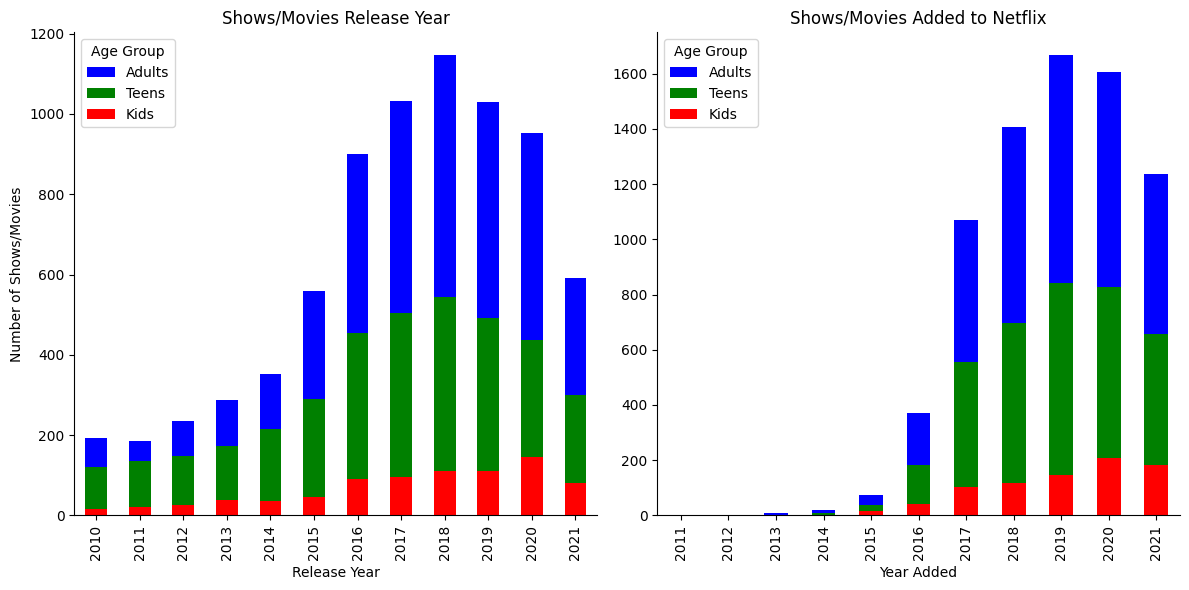

In [9]:
# Group by age_group
release_year_age_group = df.groupby(['release_year', 'age_group']).size().unstack(fill_value=0)
year_added_age_group = df.groupby(['year', 'age_group']).size().unstack(fill_value=0)

# Desired order
desired_order = ['Kids', 'Teens', 'Adults']

# Reorder the columns of the DataFrame
release_year_age_group = release_year_age_group[desired_order]
year_added_age_group = year_added_age_group[desired_order]

# Define colors for each age group
colors = ['red', 'green', 'blue']

# Plotting the charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Age group targeting over release years
release_year_age_group.plot(kind='bar', stacked=True, ax=axes[0], color = colors)

# can order in this way too
# axes[0].bar(release_year_age_group.index, release_year_age_group['Adults'], label='Adults')
# axes[0].bar(release_year_age_group.index, release_year_age_group['Teens'], label='Teens')
# axes[0].bar(release_year_age_group.index, release_year_age_group['Kids'], label='Kids')

axes[0].set_title('Shows/Movies Release Year')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Number of Shows/Movies')
axes[0].legend(title='Age Group')

# Plot 2: Age group targeting over years shows/movies added to Netflix
year_added_age_group.plot(kind='bar', stacked=True, ax=axes[1], color = colors)
axes[1].set_title('Shows/Movies Added to Netflix')
axes[1].set_xlabel('Year Added')
axes[1].legend(title='Age Group')

# Get rid of spines
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Custom legend order
handles, labels = axes[0].get_legend_handles_labels()
order = [2, 1, 0]  # Adults, Teens, Kids
axes[0].legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Age Group')

handles, labels = axes[1].get_legend_handles_labels()
order = [2, 1, 0]  # Adults, Teens, Kids
axes[1].legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Age Group')


plt.tight_layout()
plt.show()

Insights:

1.	Age Group Targeting Over Release Years:
* There’s a noticeable distribution of content across various age groups in different years.
* It appears that shows/movies has consistently targeted teens and adults with a significant amount of content, especially in recent years.
2.	Age Group Targeting Over Years Shows/Movies Added to Netflix:
* The distribution of content across age groups shows that Netflix has been bringing in a diverse range of shows and movies for different age groups each year.
* In recent years, there is a noticeable increase in content for adults and teens, suggesting a strong focus on these demographics.

Understanding the Impact:

If you are part of the teen or adult age group, Netflix has a substantial offering that caters to your demographic. For families with kids, Netflix also provides a considerable amount of content suitable for children, though the focus on adult and teen content is more pronounced in recent years.

In [10]:
'''
#6 (victor)
Question: use quarterly data to get counts of type released and see what types of shows are popular during which season
comments: Since most people have holidays in Dec/Jan, is the content more likely around tht season?
'''

'\n#6 (victor)\nQuestion: use quarterly data to get counts of type released and see what types of shows are popular during which season\ncomments: Since most people have holidays in Dec/Jan, is the content more likely around tht season?\n'

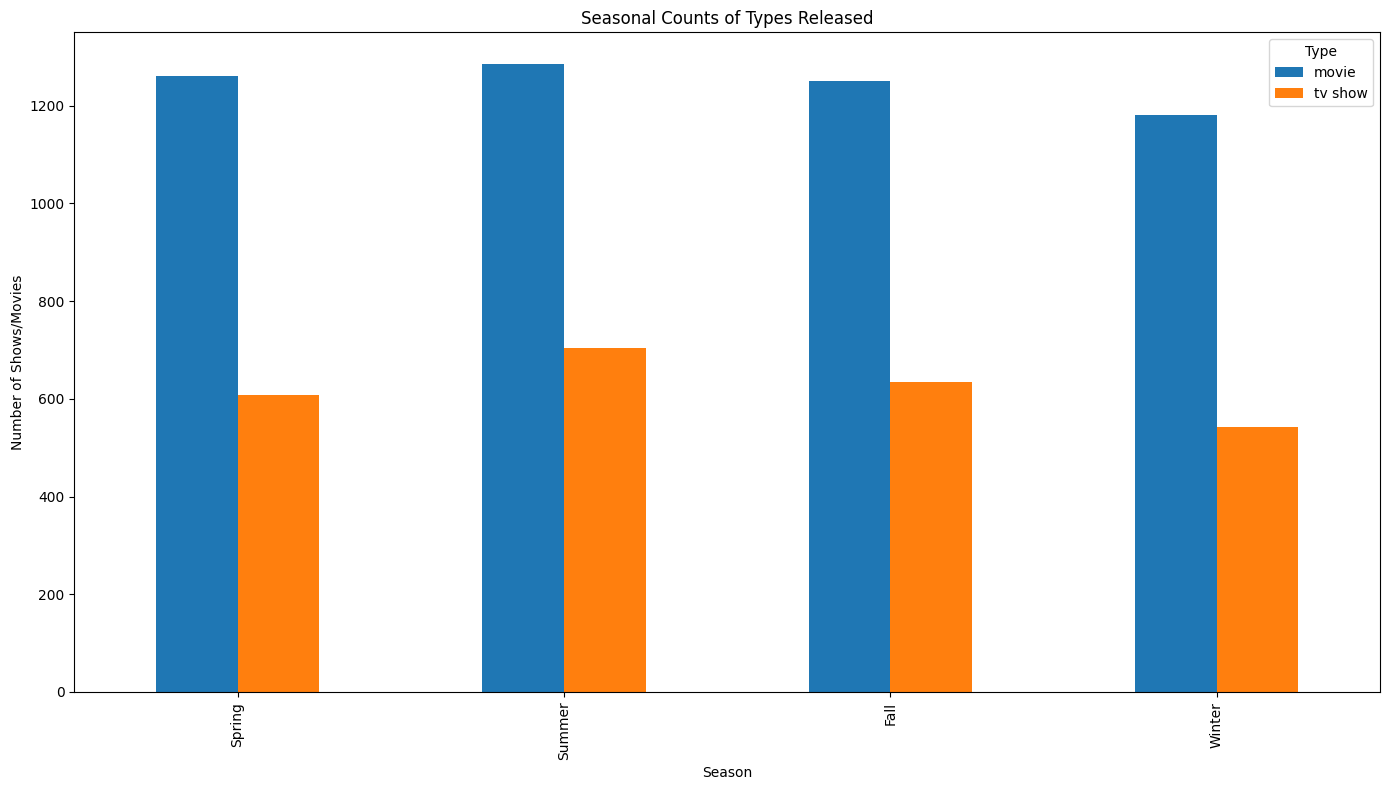

In [15]:
# Map quarters to seasons
df['season_added'] = df['date_added'].dt.quarter.map({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
})

# Group by season and type to get the counts
df_seaonsal = df.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Plotting the seasonal counts
fig, ax = plt.subplots(figsize=(14, 8))

df_seaonsal.loc[['Spring', 'Summer', 'Fall', 'Winter']].plot(kind='bar', stacked=False, ax=ax)
ax.set_title('Seasonal Counts of Types Released')
ax.set_xlabel('Season')
ax.set_ylabel('Number of Shows/Movies')
ax.legend(title='Type')

plt.tight_layout()
plt.show()
